**건강검진 데이터 시각화하기**
---
> **목차(Context)**

* 데이터 살펴보기
* EDA

In [2]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
# # ▶ 한글 폰트 설정하기
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic')
# plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# # ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

## **데이터 준비하기**
---

> **데이터 준비하기**

- 데이터 출처 : [공공데이터 포털](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation) `국민건강보험공단_건강검진정보`

    - 본 미션에서는 2022년 버전을 사용합니다. '국민건강보험공단_건강검진정보_20221231.CSV' 파일을 찾아 import 해주세요.

- 데이터 명세  

| No. | 표준항목명          | 영문명            | 설명                                                                                                           | 표현형식/단위          | 예시         |
|-----|-----------------|------------------|---------------------------------------------------------------------------------------------------------------|---------------------|--------------|
| 1   | 기준년도          | HCHK_YEAR        | 해당 정보의 기준년도를 제공함                                                                                  | YYYY                | 2009         |
| 2   | 가입자일련번호       | IDV_ID           | 해당가입자에 부여한 일련번호                                                                                  | 1 ~ 1,000,000       | 1            |
| 3   | 시도코드          | SIDO             | 해당 수진자 거주지의 시도코드                                                                                  | -                   | 26           |
| 4   | 성별              | SEX              | 해당 정보 대상자의 성별을 제공함                                                                               | 성별 : 1(남자), 2(여자) | 1            |
| 5   | 연령대코드(5세단위)    | AGE_GROUP        | 기준년도에 수진자의 나이를 5세 단위로 그룹화하여 구분한 코드                                                     | 5세 단위 그룹화, 85세 이상은 85+로 그룹화 | -            |
| 6   | 신장(5cm단위)     | HEIGHT           | 검진자의 키(5CM 단위)                                                                                          | N/Cm                | 140          |
| 7   | 체중(5kg단위)     | WEIGHT           | 검진자의 몸무게(5KG 단위)                                                                                      | N/Kg                | 45           |
| 8   | 허리둘레          | WAIST            | 검진자의 허리둘레                                                                                              | N/Cm                | 82           |
| 9   | 시력(좌)          | SIGHT_LEFT       | 수검자의 좌측 눈의 시력                                                                                        | N                   | 0.5          |
| 10  | 시력(우)          | SIGHT_RIGHT      | 수검자의 우측 눈의 시력                                                                                        | N                   | 0.5          |
| 11  | 청력(좌)          | HEAR_LEFT        | 수검자의 좌측 귀의 청력                                                                                        | N                   | 1            |
| 12  | 청력(우)          | HEAR_RIGHT       | 수검자의 우측 귀의 청력                                                                                        | N                   | 1            |
| 13  | 수축기혈압         | BP_HIGH          | 검진자의 최고 혈압으로 심장이 수축해서 강한 힘으로 혈액을 동맥에 보낼 때의 혈관 내압                                   | N/mmHg              | 140          |
| 14  | 이완기혈압         | BP_LWST          | 검진자의 최저 혈압으로 심장의 완기시의 혈압                                                                      | N/mmHg              | 81           |
| 15  | 식전혈당(공복혈당)    | BLDS             | 검진자 식사 전 혈당(혈액 100ml당 함유 되어 있는 포도당의 농도) 수치                                               | N/mg/dL             | 94           |
| 16  | 총콜레스테롤        | TOT_CHOLE        | 혈청 중의 에스텔형, 비에스테형(유리)콜레스테롤의 합                                                               | N/mg/dL             | 164          |
| 17  | 트리글리세라이드    | TRIGLYCERIDE     | 단순지질 혹은 중성지질을 뜻함                                                                                    | N/mg/dL             | 94           |
| 18  | HDL콜레스테롤      | HDL_CHOLE        | HDL(고밀도 리포단백질)에 포함되는 콜레스테롤                                                                      | N/mg/dL             | 45           |
| 19  | LDL콜레스테롤      | LDL_CHOLE        | LDL(저밀도 리포단백질)에 함유된 콜레스테롤                                                                        | N/mg/dL             | 150, 130     |
| 20  | 혈색소            | HMG              | 혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수행       | N/g/dL              | 15.3984375   |
| 21  | 요단백            | OLIG_PROTE_CD    | 소변에 단백질이 섞여 나오는 것                                                                                  | N                   | 1            |
| 22  | 혈청크레아티닌       | CREATININE       | 크레아틴의 탈수물로 내인성 단백대사의 종말산물로서 신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함 | N/mg/dL             | 0.8          |
| 23  | 혈청지오티(AST)    | AST              | 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌, 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함 | N/IU/L              | 12           |
| 24  | 혈청지피티(ALT)    | ALT              | 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함        | N/U/L               | 15           |
| 25  | 감마지티피         | GAMMA_GTP        | 간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함 | N/U/L               | 119, 114     |
| 26  | 흡연상태           | SMK_STAT_TYPE_CD | 해당 수검자의 흡연 상태 여부                                                                                    | N                   | 1            |
| 27  | 음주여부           | DRK_YN           | 해당 수검자의 음주 상태 여부                                                                                    | N/Y                 | 1            |
| 28  | 구강검진수검여부     | HCHK_OE_INSPEC_YN | 해당 검진자가 구강검진을 선택하여 검진하였는지 여부에 대한 항목                                                   | N/Y                 | 1            |
| 29  | 치아우식증유무       | CRS_YN           | 해당 수검자의 치아우식증 유무                                                                                   | N                   | 1            |
| 30  | 치석              | TTR_YN           | 해당 수검자의 치석 여부                                                                                         | N/Y                 | 1            |

     


In [4]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
from pathlib import Path

#현재 작업 중인 파일의 부모 폴더(프로젝트 루트)를 기준으로 경로 설정
current_path = Path.cwd() #cwd() : Current Working Directory : 현재 작업 디렉토리를 찾아오라는 의미. 
while current_path.name != "codeit-bootcamp-DA13":
    current_path = current_path.parent

ROOT_PATH = current_path # 기준점
DATA_PATH = ROOT_PATH / "data" / "20260116_08_ DataFrame_Mastery"

df = pd.read_csv( DATA_PATH / "국민건강보험공단_건강검진정보_20221231.csv", encoding = "cp949")


## **EDA : Data 살펴보기**  
---

* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

### 전체적인 데이터 살펴보기

#### 문제2. 데이터의 형태를 확인해보세요.
- 몇 개의 데이터가 존재하나요?
- 몇 개의 특성이 존재하나요?

- 1000000의 데이터가 존재합니다.
- 30개의 특성이 존재합니다.

In [6]:
# Data 형태 확인
df.shape


(1000000, 30)

#### 문제3. 데이터의 타입을 확인해보세요.
- 어떤 특성들이 데이터에 포함되어 있나요?
- 각 특성의 값은 어떤 데이터 타입으로 구성되어 있나요?

- 건강검진 관련 컬럼과 개인정보 등의 데이터가 포함되어 있습니다.
- 정수와 실수로 구성되어 있습니다.

In [7]:
# Data type 확인
df.dtypes

기준년도             int64
가입자일련번호          int64
시도코드             int64
성별               int64
연령대코드(5세단위)      int64
신장(5cm단위)        int64
체중(5kg단위)        int64
허리둘레           float64
시력(좌)          float64
시력(우)          float64
청력(좌)          float64
청력(우)          float64
수축기혈압          float64
이완기혈압          float64
식전혈당(공복혈당)     float64
총콜레스테롤         float64
트리글리세라이드       float64
HDL콜레스테롤       float64
LDL콜레스테롤       float64
혈색소            float64
요단백            float64
혈청크레아티닌        float64
혈청지오티(AST)     float64
혈청지피티(ALT)     float64
감마지티피          float64
흡연상태           float64
음주여부           float64
구강검진수검여부         int64
치아우식증유무        float64
치석             float64
dtype: object

In [8]:
# 데이터 값 확인 - 상위 30행을 출력하여 데이터를 확인해보세요.
df.head(30)


,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,...,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,...,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,...,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,...,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,...,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN
5,2022,4207013,41,1,7,170,85,93.5,1.0,1.0,...,1.0,0.8,19.0,31.0,29.0,1.0,1.0,0,NaN,NaN
6,2022,1773908,41,2,5,160,40,57.0,1.0,1.0,...,1.0,0.8,23.0,10.0,10.0,1.0,1.0,0,NaN,NaN
7,2022,4265572,41,1,7,180,65,74.8,1.0,1.0,...,1.0,0.8,13.0,10.0,19.0,1.0,1.0,0,NaN,NaN
8,2022,2303478,41,2,6,155,50,66.0,1.0,1.0,...,1.0,0.8,9.0,7.0,20.0,1.0,1.0,0,NaN,NaN
9,2022,4099406,41,2,6,165,55,68.0,1.0,1.0,...,1.0,0.8,32.0,33.0,20.0,1.0,1.0,0,NaN,NaN


총콜레스테롤	트리글리세라이드	HDL콜레스테롤	LDL콜레스테롤 치아우식증유무	치석 의 컬럼은 결측치가 많은 것으로 보입니다.

#### 문제4 : 결측치 확인하기
- 각 특성 별로 결측치 개수와 비율을 확인해보세요.
- 결측치의 양상이 특성마다 차이가 난다면, 왜 그런 차이가 발생했을까요?

- 결측치 0(완전한 데이터): 기준년도, 가입자일련번호, 성별, 연령대, 신장, 체중 둥. 
    - 이유: 건강검진을 받는 사람이라면 반드시 기입해야 하는 기본 행정 정보 및 신체 기본 계측치이기 때문이다.
- 결측치 약 5,500건 : 혈압, 식전혈당, 혈색소, 혈청크레아티닌 등. 
    - 이유 : 혈액 검사나 혈압 측정 단계에서 기기 오류가 발생했거나, 특정 사유로 기본 검진 항목 중 일부를 누락했을 가능성이 클 것으로 예상된다.
- 결측치 약 65만 건 이상(대규모 결측): 총콜레스테롤, 트리글리세라이드, HDL/LDL 콜레스테롤, 치아우식증유무 등.
    -  이유: 총콜레스테롤	트리글리세라이드	HDL콜레스테롤	LDL콜레스테롤은 앞부분은 결측치로 채워져 있느나 뒷부분이 채워져 있는 것을 보아 정책 변화 등에서 기인한 것으로 보인다. 치과 검진의 경우 일반 검진과 별도로 진행되는 경우가 많아 누락율이 높게 나타나는 것으로  예상된다.

=> 결측치 분포를 보아 하니, 해당 데이터셋은 정책변화와 같은 시계열적 변화와 수검자의 선택적 참여 특성이 강하게 반영되어 있다. 따라서 콜레스테롤이나 치과 관련 항목을 분석할 때는 결측치를 단순히 제거하기보다는, 해당 항목이 존재하는 유효 표본만을 분리하여 별도의 상관관계 분석을 진행하는 것이 데이터 왜곡을 줄이는 올바른 전략이라고 판단된다.

In [9]:
# 아래 예시는 결측치가 없는 열은 필터링해서 확인하였습니다
df.isna().sum()

기준년도                0
가입자일련번호             0
시도코드                0
성별                  0
연령대코드(5세단위)         0
신장(5cm단위)           0
체중(5kg단위)           0
허리둘레              392
시력(좌)             186
시력(우)             185
청력(좌)             115
청력(우)             116
수축기혈압            5556
이완기혈압            5556
식전혈당(공복혈당)       5611
총콜레스테롤         654382
트리글리세라이드       654386
HDL콜레스테롤       654386
LDL콜레스테롤       660926
혈색소              5616
요단백             11054
혈청크레아티닌          5615
혈청지오티(AST)       5613
혈청지피티(ALT)       5613
감마지티피            5611
흡연상태               96
음주여부               73
구강검진수검여부            0
치아우식증유무        655671
치석             655670
dtype: int64

#### 문제5 : 결측치 시각화하기
- 데이터프레임에서 결측치가 존재하는 부분을 시각화해보세요.

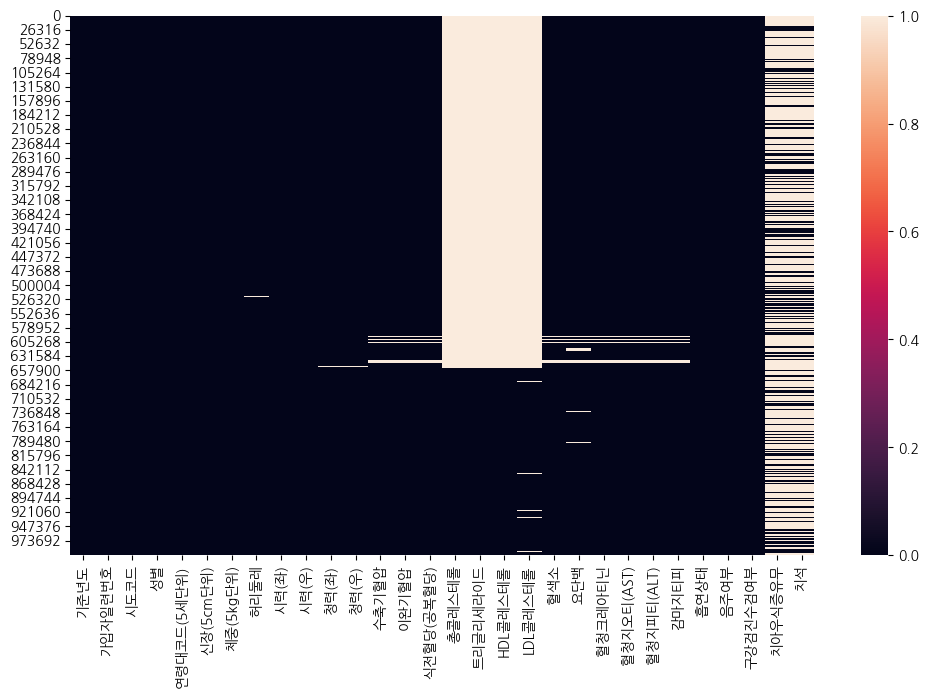

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())
plt.show()

In [11]:
# 어떤 데이터에서 결측치가 관측되었나요? 해당 데이터는 어떻게 전처리하는 게 좋을까요?


- 결측치 관측: 시각화 결과, 총콜레스테롤, 트리글리세라이드, HDL/LDL 콜레스테롤 등 혈액 정밀 검사항목과 치아우식증유무, 치석 등 구강 검진 항목에서 대규모 결측이 관찰됐다. 특히 콜레스테롤 관련 항목들은 특정 행 구간에 집중적으로 결측치가 몰려 있는 블록 형태를 띠고 있다. 
- 전처리 방법: 해당 데이터들의 경우, 결측치 비율이 60%를 상회하므로, 전체 데이터를 대상으로 하는 분석에서는 해당 컬럼들을 삭제하는 것이 데이터의 신뢰성을 높이는 방법이다. 
혹은 콜레스테롤 관련 수치가 핵심 변수라면, 해당 데이터가 존재하는 2008년 의 수검자들만 따로 추출하는 분석 전략도 생각해 볼 수 있다.

#### 문제6 : 중복값 확인하기
- 데이터에 중복값이 있는 지 확인해보세요. 만약 있다면, 제거하세요.

- 중복값은 없는 것으로 확인된다.

In [12]:
df.duplicated().sum()

np.int64(0)

#### 문제7 : 연령대 코드 수정하기
- 현재 데이터는 연령대를 코드로 제공하고 있습니다. 연령대 코드가 의미하는 바는 다음 표와 같습니다.
- `연령대`라는 새로운 열을 만들고, 연령대 코드를 의미하는 연령대로 매핑해보세요.

In [13]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')

In [14]:
# 연령대 코드 매핑
age_group_mapping = {
    1: "0-4", 2: "5-9", 3: "10-14", 4: "15-19", 5: "20-24",
    6: "25-29", 7: "30-34", 8: "35-39", 9: "40-44", 10: "45-49",
    11: "50-54", 12: "55-59", 13: "60-64", 14: "65-69", 15: "70-74",
    16: "75-79", 17: "80-84", 18: "85+"
}

In [15]:
# 연령대 코드를 새로운 매핑으로 업데이트 해보세요
# map(): 특정 열의 값을 딕셔너리의 키와 대조해서 값으로 한꺼번에 바꿔줌.
df['연령대'] = df['연령대코드(5세단위)'].map(age_group_mapping)


In [16]:
df.head(10)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령대
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,...,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN,65-69
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,...,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN,40-44
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,...,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN,60-64
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,...,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN,25-29
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,...,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN,30-34
5,2022,4207013,41,1,7,170,85,93.5,1.0,1.0,...,0.8,19.0,31.0,29.0,1.0,1.0,0,NaN,NaN,30-34
6,2022,1773908,41,2,5,160,40,57.0,1.0,1.0,...,0.8,23.0,10.0,10.0,1.0,1.0,0,NaN,NaN,20-24
7,2022,4265572,41,1,7,180,65,74.8,1.0,1.0,...,0.8,13.0,10.0,19.0,1.0,1.0,0,NaN,NaN,30-34
8,2022,2303478,41,2,6,155,50,66.0,1.0,1.0,...,0.8,9.0,7.0,20.0,1.0,1.0,0,NaN,NaN,25-29
9,2022,4099406,41,2,6,165,55,68.0,1.0,1.0,...,0.8,32.0,33.0,20.0,1.0,1.0,0,NaN,NaN,25-29


### 개별 데이터 살펴보기

#### 문제8 : 수치형 데이터와 범주형 데이터 구분하기
- 수치형 데이터와 범주형 데이터는 데이터를 살펴보는데 차이가 있습니다. 수치형 데이터와 범주형 데이터를 구분하세요.

In [17]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '연령대'],
      dtype='object')

In [18]:
# 범주형 데이터 | 변수에 저장하는 과정 꼭 잊지 말 것. 
category_cols= df[['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)','흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '연령대']].astype('str')


In [19]:
# 수치형 데이터
numeric_cols = df[['신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']].astype('float')

In [20]:
category_cols.info()
numeric_cols.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   기준년도         1000000 non-null  object
 1   가입자일련번호      1000000 non-null  object
 2   시도코드         1000000 non-null  object
 3   성별           1000000 non-null  object
 4   연령대코드(5세단위)  1000000 non-null  object
 5   흡연상태         1000000 non-null  object
 6   음주여부         1000000 non-null  object
 7   구강검진수검여부     1000000 non-null  object
 8   치아우식증유무      1000000 non-null  object
 9   치석           1000000 non-null  object
 10  연령대          1000000 non-null  object
dtypes: object(11)
memory usage: 83.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   신장(5cm단위)   1000000 non-null  float64
 1   체중(5kg단위)   1000000 non-null  float64
 2 

In [21]:
# 수치형 변수의 기술 통계량
numeric_cols.describe()

,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피
count,1000000.000000,1000000.000000,999608.000000,999814.000000,999815.000000,999885.000000,999884.000000,994444.000000,994444.000000,994389.000000,345618.000000,345614.000000,345614.000000,339074.000000,994384.000000,988946.000000,994385.000000,994387.000000,994387.000000,994389.000000
mean,162.631760,64.301000,81.422321,0.958738,0.957365,1.035089,1.033892,123.151976,75.766153,100.988888,197.984923,131.855564,56.865400,115.534046,14.214367,1.131239,0.836899,26.975235,26.604105,36.046350
std,9.359053,13.791024,11.056493,0.582629,0.576159,0.194757,0.191650,14.675753,10.252728,23.619450,42.969755,103.474645,15.415803,38.654386,1.547857,0.494855,0.348397,20.931586,25.606409,67.982649
min,130.000000,30.000000,7.600000,0.100000,0.100000,1.000000,1.000000,54.000000,10.000000,10.000000,42.000000,1.000000,1.000000,1.000000,0.100000,1.000000,0.040000,1.000000,0.000000,1.000000
25%,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,113.000000,69.000000,89.000000,169.000000,75.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,15.000000
50%,165.000000,65.000000,81.000000,1.000000,1.000000,1.000000,1.000000,122.000000,76.000000,96.000000,197.000000,107.000000,55.000000,114.000000,14.200000,1.000000,0.800000,23.000000,21.000000,23.000000
75%,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,132.000000,82.000000,106.000000,225.000000,157.000000,65.000000,140.000000,15.300000,1.000000,1.000000,30.000000,31.000000,38.000000
max,195.000000,135.000000,999.000000,9.900000,9.900000,3.000000,3.000000,269.000000,180.000000,910.000000,2176.000000,7766.000000,871.000000,2152.000000,25.000000,6.000000,90.000000,4532.000000,4390.000000,9999.000000


In [22]:
# 각 변수들은 어떤 특징을 가지고 있나요?

- 전반적으로 정규 분포 형태를 띄나, 키와 식전 혈당(공복혈당)의 경우 평균과 중앙값의 차가 있으며, 특히 식전 혈당(공복혈당)의 표준 편차는 23으로 당노 등 관리군에 의한 우측 꼬리 분포가 예상된다.

- 트리글리세라이드 역시 표준 편차가 131로 극단적인 편차를 보인다. 이 컬럼의 경우 식습관이나 유전적인 요인에 따라 개인차가 극심하여 원래 변동성이 큰 항목이다. 

- 혈청지오디와 혈청지피티, 감마지피티의 경우에도 각각 표준편차가 20, 25, 67로 변동서잉 크며, 군집화의 가능성을 시사한다. 즉, '정상군'과 '주의군'의 데이터가 섞여 있어 표준편차를 높이고 있을 확률이 높다.   

트리글리세라이드와 간 지표에서 나타나는 극단적인 변동성은 전체 대표성을 약화시킬 수 있으므로, 따라서 향후 분석에서는 전체 평균보다는 위험군으로 분리하여 접근하는 전처리가 필요할 것으로 판단된다.


In [23]:
# 범주형 변수의 기술 통계량
category_cols.describe()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령대
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,1,1000000,17,2,14,4,3,2,3,4,14
top,2022,702763,41,1,11,1.0,1.0,0,nan,nan,50-54
freq,1000000,1,265327,515301,127890,641017,655146,655670,655671,655670,127890


In [24]:
# 각 변수들은 어떤 특징을 가지고 있나요?
# top: 최빈값
# freq: 최빈값이 나타난 횟수 

- 기준년도: 최빈값은 2022, unique는 1개로, 모든 데이터가 2022년 단일 연도 데이터임을 알 수 있다. 
- 가입자 일련번호: 개수와 고유값 개수가 동일한 것을 보아, 중복 없는 개인 식별자(ID)임을 알 수 있다.
- 시도코드: unique가 17개로, 한국의 17개 시도 데이터가 모두 포함되었으며 코드 41(경기도) 거주자가 가장 많이 검진을 받았다.
- 성별: 남성이 51%로, 남녀비율이 1:1이다.
- 흡연상태: 흡연 상태가 4가지인 것을 보아 nan도 포함되었을 것으로 예상된다.
- 음주 여부: 음주 여부 역시 3가지인 것을 보아 nan도 포함되었을 것으로 예상된다. 
- 구강검진수검여부: 65.5%가 구강검진을 받지 않았다. 이는 치과 검진의 낮은 참여율을 보여준다. 
- 치아증식유무: 앞서 결측치 확인에서 확인 했듯이 nan이 65% 비율을 차지하고 있다. 
- 치석:앞서 결측치 확인에서 확인 했듯이 nan이 65% 비율을 차지하고 있다. 
- 연령대: 50~54 사이 연령대가 가장 건강 검진을 많이 받는 연령대인 것으로 확인된다.

#### 문제10 : 분포 확인하기
- 각 데이터가 어떻게 분포되어 있는지 확인해보세요.
- 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지, 아니라면 그 이유가 무엇인지 확인해보세요.

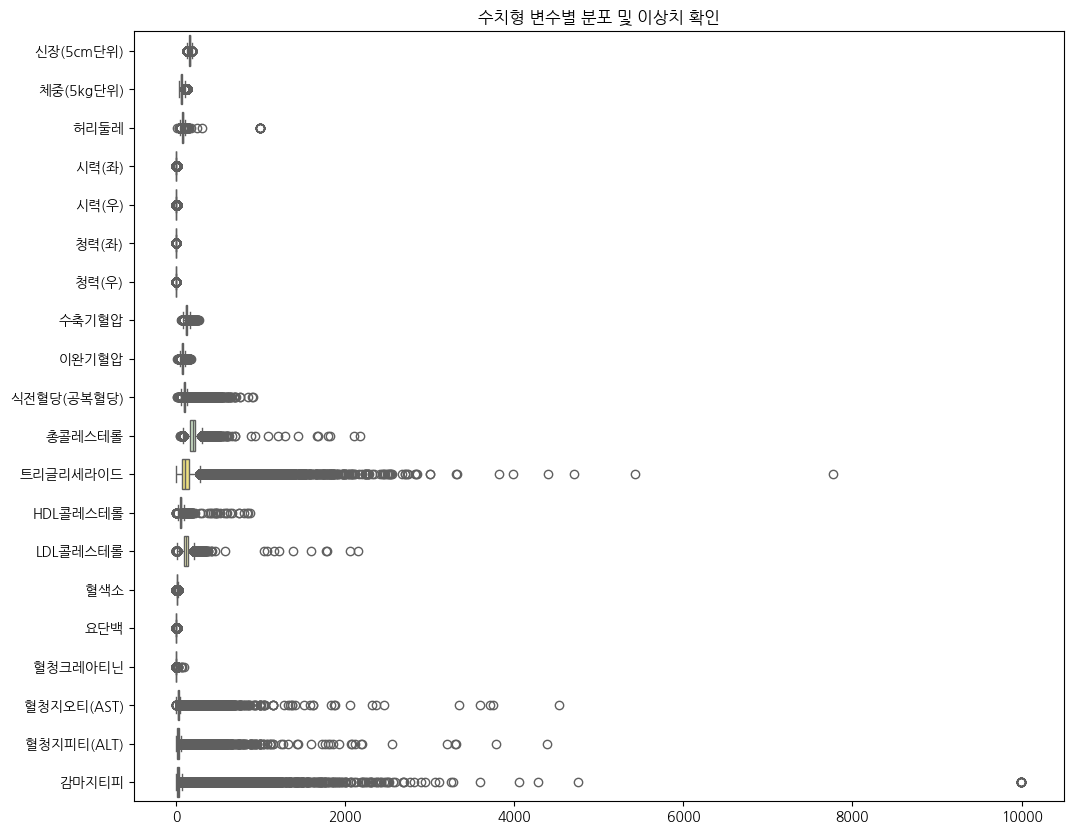

In [25]:
#수치형 변수 박스플롯- 세로형
plt.figure(figsize=(12,10))
sns.boxplot(data =numeric_cols, orient ='h', palette = 'Set3')
plt.title("수치형 변수별 분포 및 이상치 확인")
plt.show()

In [26]:
category_cols.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '연령대'],
      dtype='object')

In [27]:
# 범주형 변수의 분포를 파악: 데이터가 각 카테고리별로 얼마나 균형 있게 퍼져 있는지, 혹은 특정 항목에 치우쳐 있는지를 확인하는 과정.
# 범주형 변수는 수치형 변수처럼 평균이나 표준편차를 계산할 수 없기 때문에, 주로 빈도나 비중을 중심으로 분석한다. 

### 속성 간의 관계 살펴보기

#### 문제11 : 상관관계 분석하기
- 수치형 데이터 간의 상관 관계를 계산하고 히트맵을 사용해 시각화해보세요.

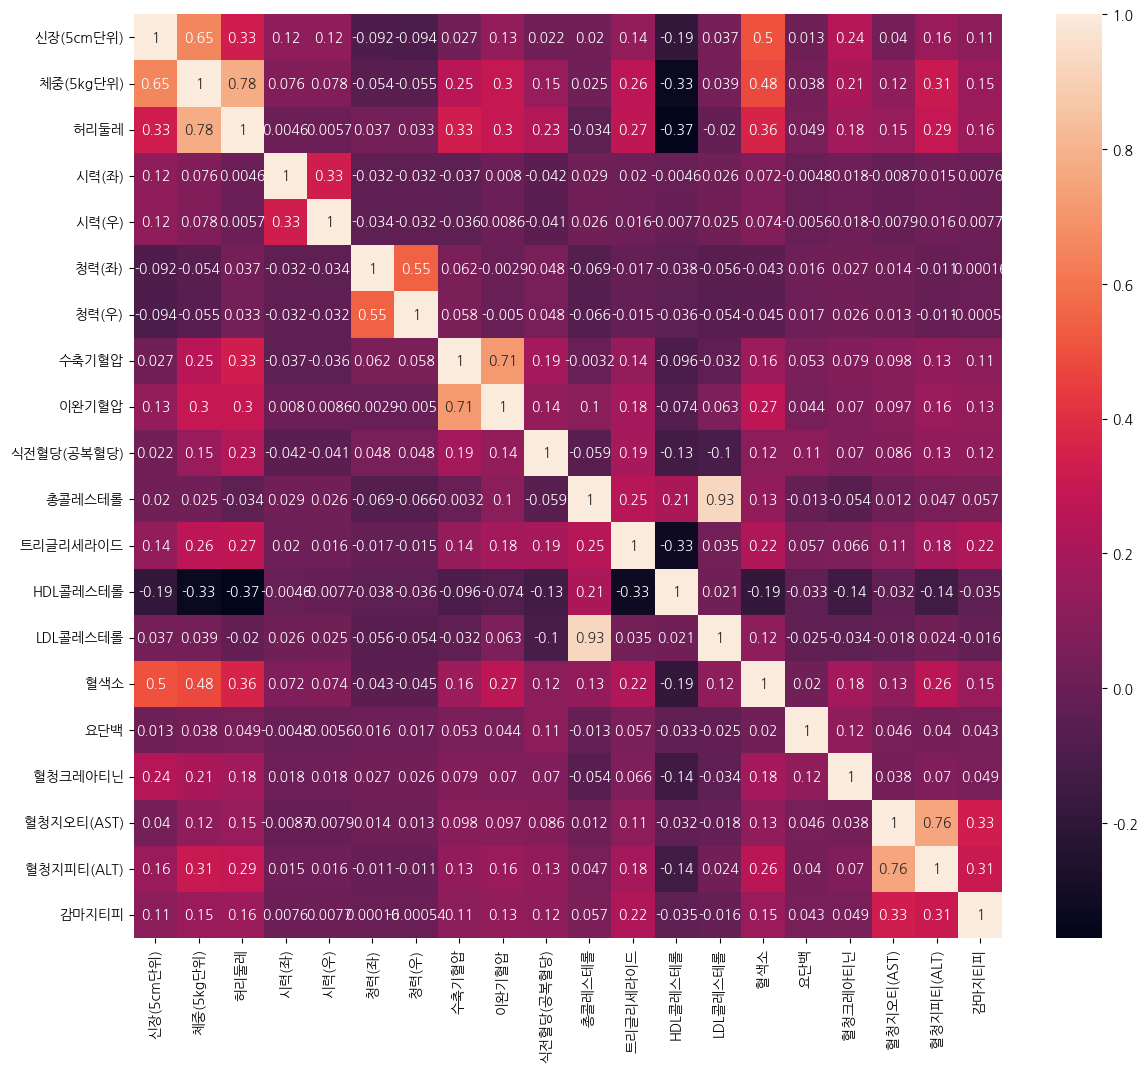

In [28]:
numeric_corr = numeric_cols.corr()
plt.figure(figsize= (14,12))
sns.heatmap(data=numeric_corr, annot = True)
plt.show()

In [29]:
# 위 시각화에서 찾을 수 있는 관계성은 어떤 것이 있나요?

- **이완기 혈압과 수축기 혈압**이 0.71로 높은 양의 상관관계를 보인다. 혈압의 두 지표는 심장 박동 주기에 따라 같이 움직이므로 높은 양의 상관관계가 나타나는 것이 생물학적으로도 매우 타당하다.

- **LDL콜레스테롤과 총콜레스테롤**이 0.93으로 아주 높은 양의 상관관계를 가진다. 총콜레스테롤 수치는 'HDL + LDL + (중성지방/5)'로 계산되기 때문에, 가장 큰 비중을 차지하는 LDL과 아주 높은 상관관계를 보이는 것이 타당하다.

- **HDL 콜레스테롤은 체중(5kg단위), 허리둘레, 트리글리세라이드**와 음의 상관관계를 가진다. 흔히 '좋은 콜레스테롤'로 불리는 HDL은 비만 지표(체중, 허리둘레)나 중성지방(트리그리세라이드) 수치가 높을수록 낮아지는 경향이 있는데, 데이터가 이를 정확히 보여주고 있다.

- **혈청지피티(ALT)와 혈청지오티(AST)**의 상관관계는 0.76으로 높은 양의 상관관계를 가진다. 두 지표 모두 간세포 손상 시 혈액으로 방출되는 효소이므로, 간 건강에 따라 함꼐 오르내는 특성이 있다.
-------------------------------------------------------------------------------
- **체중(5kg단위)과 허리둘레**의 상관관계가 0.78로 매우 높다. 이는 비만 분석 시 두 변수 중 하나만 사용해도 충분하거나, 두 변수를 조합해 BMI같은 새로운 지표를 만드는 것이 효율적임을 시사한다.
- **혈색소는 신장, 체중과** 각각 0.5, 0,48로 유의미한 양의 상관관계를 보인다. 일반적으로 체격이 클수록 혈액량이 많고 혈색소 수치가 높은 경향을 데이터가 뒷받침하고 있다. 
- **식전 혈당과 허리둘레**는 상관계수가 0.23 아주 높지는 않지만, 다른 지표들에 비해 식전혈당이 허리둘레나 체중과 연결되어 있음을 알 수 있다. 이는 복부 비만이 당뇨 리스크와 연관이 있다는 의학적 상식과 일치한다. 
- **감마지피티는 AST, ALT**와 각각 0.33, 0.31로 양의 상관관계를 보인다. 특히 음주와 밀접한 감마지피티가 간 수치들과 함꼐 움직이는 점은 향후 '음주여부'변수와 결합해 분석할 수 있을 것으로 보인다. 

#### 문제12 : 수치형 변수들 간의 산점도 및 각 변수의 히스토그램을 그려 보세요

- 4가지 변수('신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압')에 대한 시각화를 진행해보세요.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 640x480 with 0 Axes>

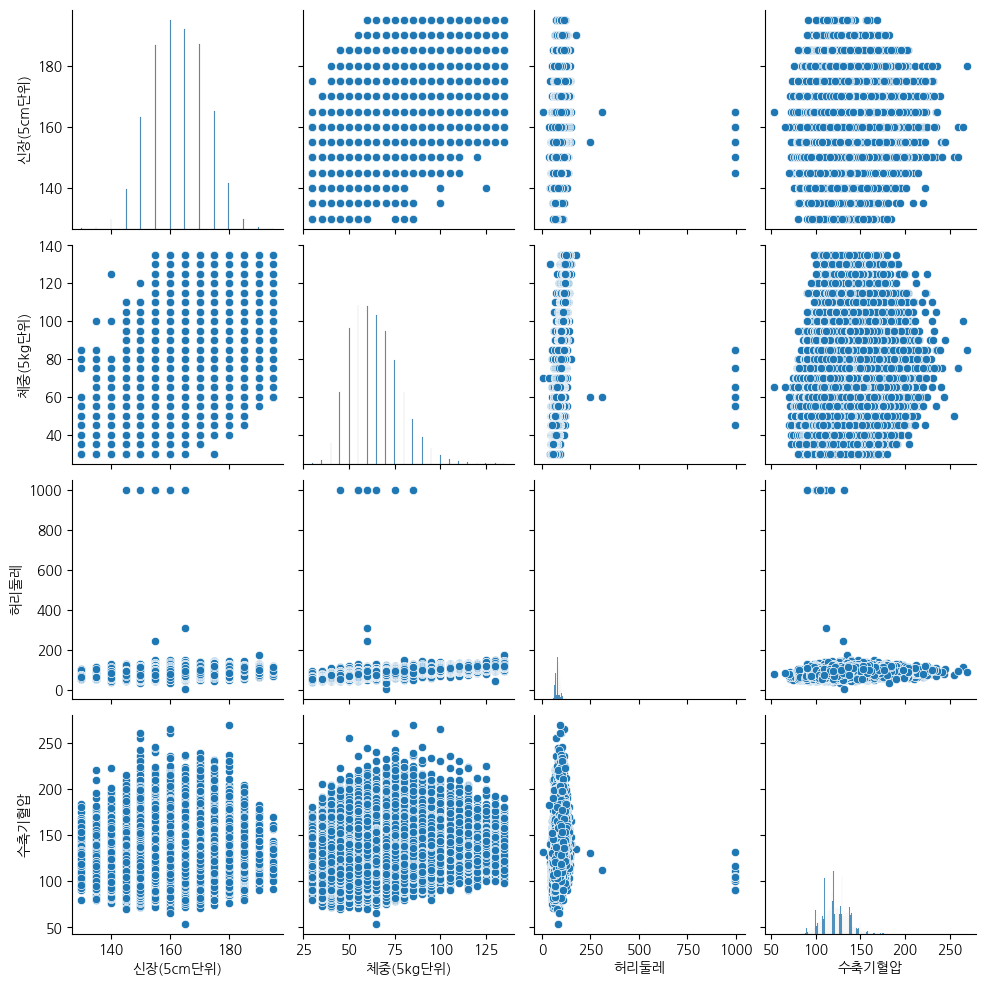

In [31]:
# 수치형 변수들에 대한 Pair Plot 그리기
plt.figure()
sns.pairplot(df[['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압']]) 
#kind='reg': 산점도 위 회귀선 | corner =True : 하단 삼각형만 보여줌. | diag_kind='kde' : 부드러운 곡선(kde) 그림 분포의 밀도 파악하기에 유용
plt.show()


#### 문제13 : 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 기술 통계 비교하기

- 범주형 변수에 따른 수치형 변수의 분포 분석해봅시다. 성별이 주요 건강 지표(신장, 체중, 허리둘레, 수축기혈압)에 어떻게 영향을 미치는지 파악하고 싶습니다.

- 카테고리별 수치형 변수의 기술 통계 분석: 각 카테고리별로 수치형 변수의 평균, 중앙값, 분산 등을 비교합니다.

In [32]:
display(category_cols.columns)
display(numeric_cols.columns)

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '연령대'],
      dtype='object')

Index(['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
       'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)',
       '감마지티피'],
      dtype='object')

In [33]:
# 기술통계
target_cols = ['신장(5cm단위)', '체중(5kg단위)','허리둘레','수축기혈압']
df.groupby('성별')[target_cols].describe().T # 대괄호 안에 열의 이름 | .T: Transpose(전치)

성별                           1              2
신장(5cm단위) count  515301.000000  484699.000000
          mean      169.051341     155.806872
          std         6.739357       6.483474
          min       130.000000     130.000000
          25%       165.000000     150.000000
          50%       170.000000     155.000000
          75%       175.000000     160.000000
          max       195.000000     185.000000
체중(5kg단위) count  515301.000000  484699.000000
          mean       71.856992      56.267952
          std        12.439555      10.131779
          min        30.000000      30.000000
          25%        65.000000      50.000000
          50%        70.000000      55.000000
          75%        80.000000      60.000000
          max       135.000000     135.000000
허리둘레      count  515283.000000  484325.000000
          mean       86.071713      76.475740
          std         9.037386      10.860201
          min         7.600000      36.000000
          25%        80.000000      69.000000
          50%        86.000000      75.800000
          75%        91.100000      82.800000
          max       310.000000     999.000000
수축기혈압     count  513176.000000  481268.000000
          mean      125.614855     120.525809
          std        13.655867      15.258578
          min        70.000000      54.000000
          25%       117.000000     110.000000
          50%       125.000000     119.000000
          75%       134.000000     130.000000
          max       269.000000     265.000000

#### 문제14 : 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 분포를 비교하기

- 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 분포를 시각화하여 비교해보세요.
- 시각화 방법은 자유롭게 선택하셔도 됩니다.

- 범주형 변수와 수치형 변수의 분포를 비교할 때는 '히스토그램'이나 '박스플롯'
    - 히스토그램(sns.histplot): 데이터가 어디에 많이 몰려 있는지, 분포의 모양의 상세히 보고 싶을 때 좋음. 단, 100만 건 데이터에서는 그리는 데 시간이 조금 걸릴 수도 있음. 
    - 박스플롯(sns.boxplot): 데이터의 통계적 요약과 이상치를 빠르게 비교할 때 앞도적으로 유리.
- 데이터 사이의 연속성이나 흐름 보여줄 때는 '라인플롯'

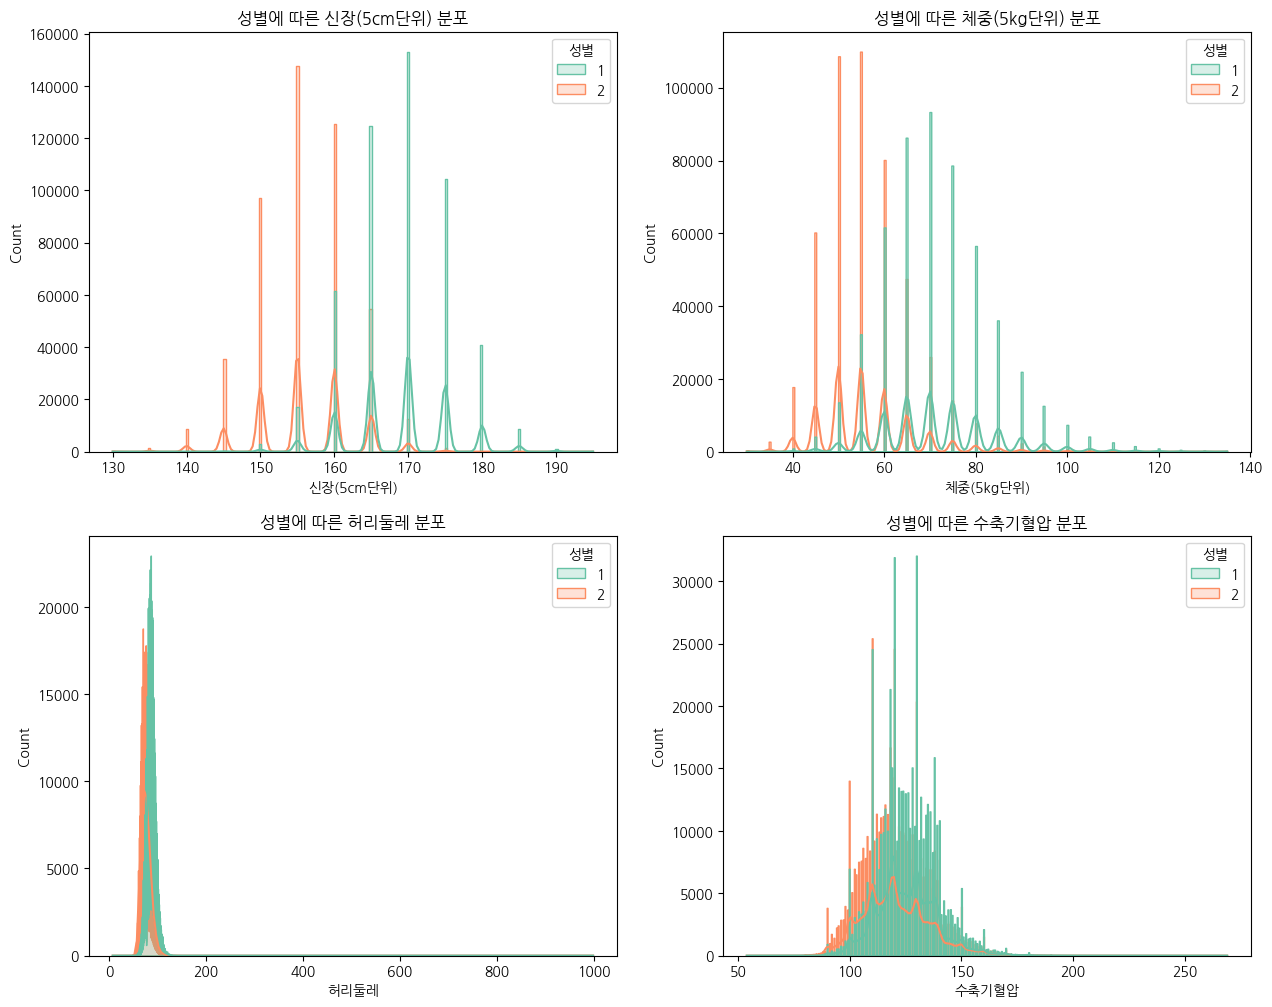

In [34]:
# 분포 - 히스토그램  
# fig(Figure): 전체 그래프 창을 의미. 전체 크기 조절하거나 파일로 저장할 때 사용.
# axes(Axes): 도화지 안에 나뉜 개별 칸들을 담고 있는 리스트. plt.subplots(2,2)를 하면 2*2 행렬의 2차원 배열로 칸이 생성됨. 
#즉,axes[0][0]은 첫 번째 칸, axes[0][1]은 두 번째 칸과 같은 주소값을 가짐. 
fig, axes = plt.subplots(2, 2, figsize =(15,12)) 
axes = axes.flatten() # flatten(): 2*2 배열을 1차원으로 펼쳐서 반복문 돌리기 쉽게 만듦

for i, col in enumerate(target_cols): # enumerate() : 리스트의 순서(인덱스)와 값을 동시에 꺼내주는 함수
    sns.histplot(data=df, x= col, hue = '성별', ax = axes[i], kde = True, palette='Set2', element= "step")
    axes[i].set_title(f'성별에 따른 {col} 분포') #element = "step": 막대를 채우지 않고 계단 모양의 선만 그림

plt.show()

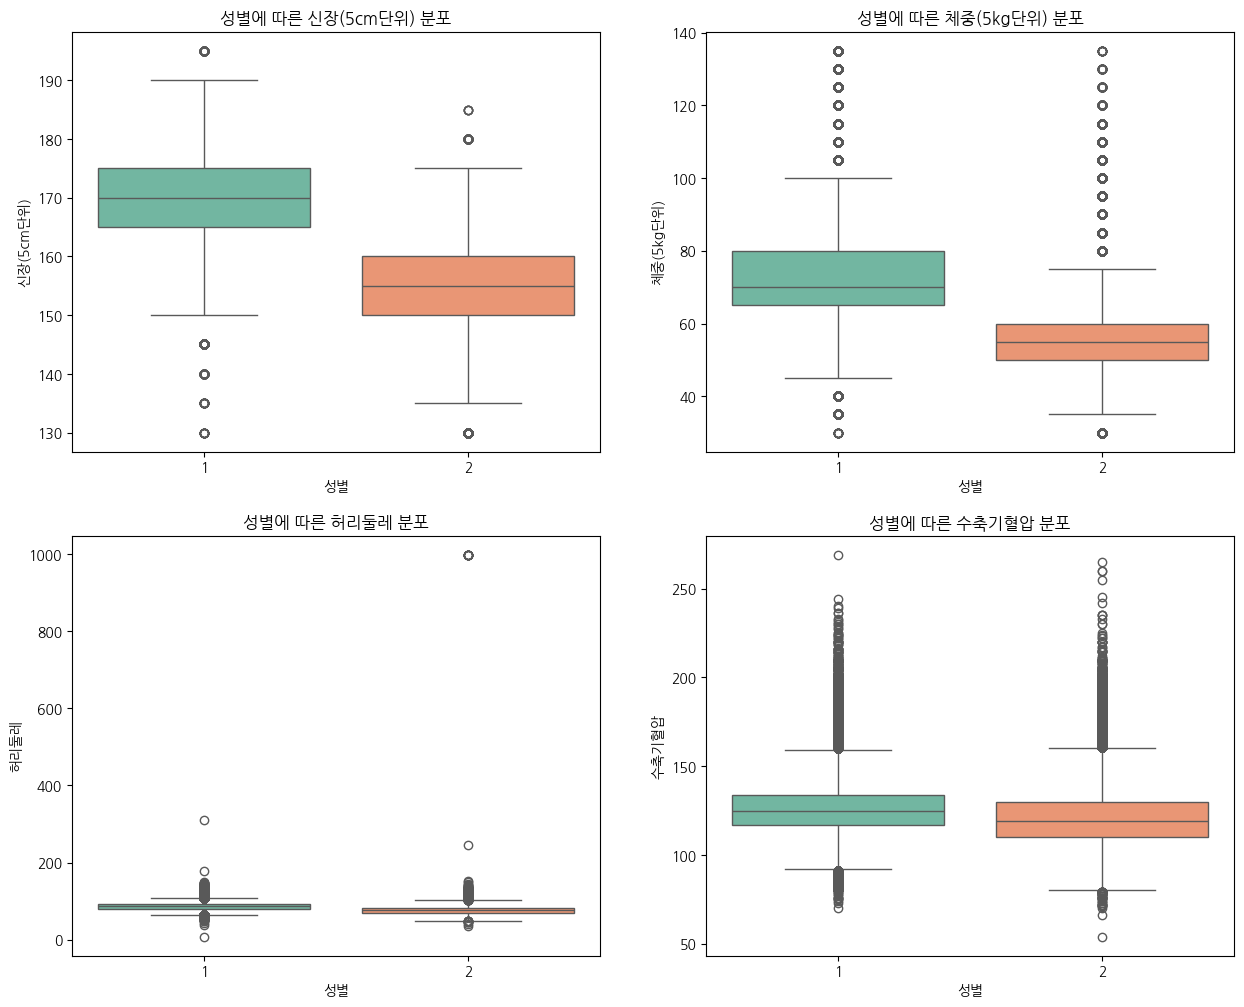

In [35]:
# 분포 - 박스플롯으로 성별 차이 대조
fig, axes = plt.subplots(2, 2, figsize =(15,12)) # plt.subplots() : 2*2 격자로 한번에 출력
axes = axes.flatten() # 2*2 배열을 1차원으로 펼쳐서 반복문 돌리기 쉽게 만듦

for i, col in enumerate(target_cols):
    sns.boxplot(data=df, x='성별', y = col, ax = axes[i], palette='Set2')
    axes[i].set_title(f'성별에 따른 {col} 분포')

plt.show()

In [36]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?

ver.1 ) 전반적으로 네 변수 모두에서 남성의 평균이 여성의 평균보다 높은 것을 알 수 있다. 
특히, 성별에 따른 체중(5kg) 분포와 성별에 따른 수축기혈압 분포에서 성별을 불문하고 이상치가 많이 나타나는 것을 볼 수 있다.  
--> 단순 현상 나열에서 원인 추론, 비즈니스/의학적 함의로 연결하는 연습 필요.

1) 기술적 관점, 2) 도메인 관점, 3) 데이터 품질 관점의 3단계로 디벨롭할 수 있는 가이드  

#### **1) 기술적 관점**
- **분포의 왜도(Skewness): 히스토그램을 보면 성별과는 무관하게 수축기혈압과 허리둘레의 **꼬리가 오른쪽으로 길게 늘어져 있다.** 이는 **"평균보다 월등히 높은 수치를 가진 고위험군이 다수 존재하며, 이들이 전체 평균을 끌어올리고 있다"**라는 분석으로 연결할 수 있다. 
- **이봉(Bimodal) 분포**의 부재: 신장 분포에서 성별을 합치면 봉우리가 두 개인 이봉 분포가 나타날 수 있지만, 성별로 나누었을 때 각각 정규분포에 가까운 형태를 띠는지 확인하는 것도 중요하다. 

#### **2) 도메인적 관점**
- **혈압의 위험군 식별**: 수축기혈압의 박스플롯 상단 이상치들은 의학적으로 '고혈압 2단계(140mmHg 이상)'에 해당할 가능성이 높다. **남녀 모두에서 정상 범위를 크게 벗어난 고혈압 위험군이 식별되므로, 이들을 대상으로 한 집중 관리가 필요하다**

- **단위의 특성 반영**: 히스토그램이 뾰족뾰족하게 나타나는 이유는 데이터가 5cm, 5kg 단위로 범주화(Binning)되어 수집되었기 때문이다. "측정값의 이산성(Discreteness)" 때문에 분포가 불연속적으로 보이나, 전체적인 경향은 성별에 따른 신체적 차이를 명확히 반영한다"고 설명할 수 있다. 

#### **3) 데이터 품질 및 비즈니스 제언**
- **데이터 정제(cleaning)의 필요성 발견**: 허리둘레 박스플롯을 보면 1000이상 가까운 이상치가 발견된다. 사람의 허리둘레가 10m일 수는 없으므로, **데이터 입력 오류나 단위 변환 과정의 실수가 포함되어 있을 가능성이 높으며, 후속 분석 전 정제가 필수적이다.**
- **마케팅/정책적 활용**: 
    - 수축기혈압의 중앙값은 남성이 더 높으나, 여성 그룹에서도 정상 범위를 상회하는 극단적 이상치가 빈번하게 관찰되어 성별에 관계 없는 혈압 관리 캠페인 등이 유효할 것으로 보인다. 
    - 타겟 세분화: 히스토그램 상에서 "남성의 신장과 체중 분포가 여성보다 우측에 형성되어 있으므로, 건강기능식품이나 의류 사이즈 설계 시 성별 타겟에 따른 차별화된 제품 규격 설정이 필요다"는 제언이 가능하다. 
- **통계적 유의성 확인**: 단순히 "평균이 높다"고 하기보다, 이 차이가 통계적으로 정말 의미가 있는지 확인하기 위해 **T-test** 등을 수행하여 "성별에 따른 신체 지표 차이가 통계적으로 유의미함(p < 0.05)을 증명할 필요가 있다."

#### 문제15 : 성별에 따른 흡연상태의 비율을 시각화해보세요

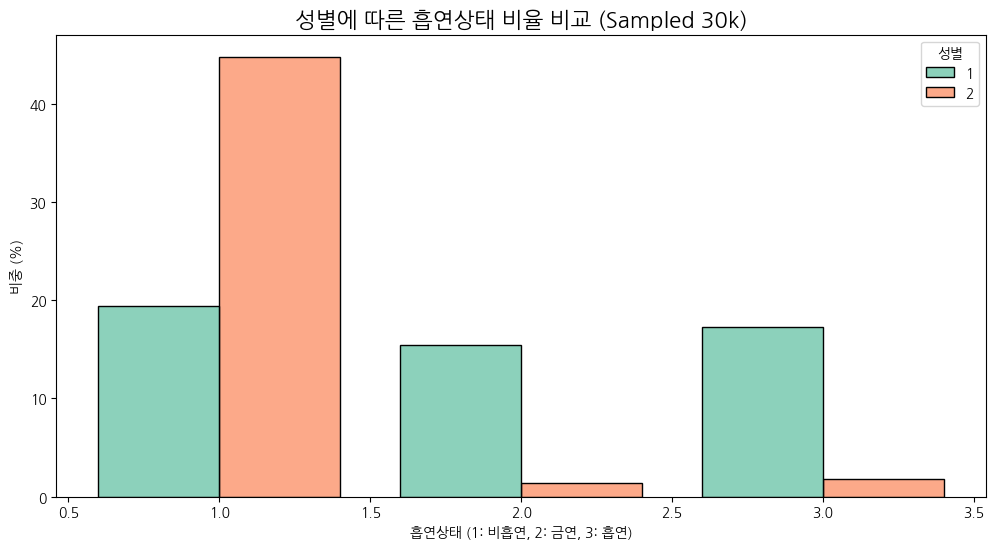

In [37]:
# 1. 전체 데이터에서 30,000개만 무작위 추출 (재현성을 위해 random_state 지정)
sample_df = df.sample(n=30000, random_state=42)

plt.figure(figsize=(12, 6))

# 2. 샘플링된 데이터로 히스토그램 그리기
sns.histplot(data=sample_df, x='흡연상태', hue='성별', 
             stat='percent', multiple='dodge', 
             discrete=True, shrink=0.8, palette='Set2')

plt.title("성별에 따른 흡연상태 비율 비교 (Sampled 30k)", fontsize=16)
plt.xlabel("흡연상태 (1: 비흡연, 2: 금연, 3: 흡연)")
plt.ylabel("비중 (%)")
plt.show()

In [38]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?


ver1)
- 여성이 남성에 비해 비흡연자 비율이 2배 이상이 된다. 여성 중 금연하거나 흡연하는 비율은 5%도 안 되는 극소수인 것으로 판단된다. 
- 반면, 남성의 경우, 흡연상태 비율이 매우 고르게 분포되어 있으며, 비흡연, 흡연, 금연 순으로 되어있다. 

성별에 따른 흡연 상태 분석 결과, 여성은 비흡연 비중이 압도적으로 높은(약 45%) 극단적 편향을 보이는 반면, 남성은 비흡연, 흡연, 금연 비중이 상대적으로 고르게 분포되어 있는 양상을 띤다. 특히 남성 흡연자 비중이 금연자보다 높게 나타나는 지점은 향후 보건 정책의 집중 타겟팅이 필요한 지점으로 판단된다.

In [39]:
# # 히스토그램
# fig, axes = plt.subplots(1, 2, figsize =(18,7)) # plt.subplots() : 2*2 격자로 한번에 출력

# #왼쪽 그래프: 남성 데이터만 필터링해 출력 
# sns.histplot(data=df[df['성별'] == '1'], x= '흡연상태', ax = axes[0], palette='Set2')
# axes[0].set_title(f"남성의 흡연상태 비율 (%)") # stat='percent': 비율 볼 때 사용 | discrete = True : 막대가 숫자 사이에 애매하게 걸치지 않고 숫자 바로 위에 깔끔하게 그려지도록 함.  

# #오른쪽 그래프: 여성 데이터만 필터링해 출력
# sns.histplot(data=df[df['성별'] == '2'], x= '흡연상태', ax = axes[1], palette='Set2')
# axes[1].set_title(f"여성의 흡연상태 비율 (%)")

# # plt.suptitle("성별에 따른 흡연상태의 비율 비교", fontsize = 16)
# plt.show()

#### 문제16 : 연령대별로 주요 건강 지표(신장, 체중, 허리둘레, 수축기혈압)를 분석해보세요.
- 연령대별로 이러한 지표들의 평균 값을 계산하여 피봇테이블을 생성하세요.

In [40]:
#aggfunc으로 여러 개의 메소드 표현
age_pivot = pd.pivot_table(df, values=target_cols ,index = '연령대' , aggfunc ='mean' )
age_pivot

,수축기혈압,신장(5cm단위),체중(5kg단위),허리둘레
연령대,,,,
20-24,115.533370,164.432351,62.536004,75.128735
25-29,117.249794,165.955701,65.557825,77.805346
30-34,118.516632,166.762097,68.026896,80.443664
35-39,120.387137,166.960435,69.278013,82.174251
40-44,120.954725,165.918420,67.787527,81.667515
45-49,122.174945,164.526454,66.212143,81.367142
50-54,123.175929,162.719955,64.351044,81.264783
55-59,124.569564,161.064055,62.909176,81.705965
60-64,126.158497,159.523098,61.566104,82.168241


In [41]:
# 위 데이터에서 어떤 인사이트를 확인할 수 있나요?


--> 분석 결과에 어떤 액션을 취하면 좋을지 한 문장씩 덧붙여보기

- 평균 수축기 혈압: 연령대가 올라갈 수록 수축기혈압도 점점 증가하다 85+에서 감소하는 형태를 보인다. 
    - 혈압 관리에 관한 제품을 마케팅할 수 있을 것으로 보인다. 
    - 40대부터 수축기혈압이 120mmHg를 넘어서는 경향이 뚜렷하므로, 40대 직장인 대상의 조기 혈압 관리 캠페인 또는 관련 건강 제품 홍보가 유효할 것으로 추정된다. 
    예) 웨어러블 혈압 측정기, 저염식 도시락 구독 서비스 

- 평균 신장: 신장의 경우 35-39까지 증가하는 형태를 보이다 그 이후로는 계속해서 감소하는 형태를 보인다. 
    - 신장이 85세 이상에서 151까지 급격히 낮아지는 것은 노화로 인한 척추 압착뿐만 아니라, 영양 상태가 달랐던 세대 효과가 반영된 결과로 해석할 수 있다. 
    - 고령층 신체 조건을 고려하여 가구의 높이를 낮추거나 의류 사이즈를 세분화하는 실버 산업 대상 '유니버설 디자인' 가이드라인을 제안할 수 있음. 

- 체중 역시 35-39까지 증가하다 그 이후로는 점점 감소하는 형태를 보인다. 
    - 중장년층(40-50대)는 체중 감량을 위한 다이어트 시장의 핵심 타겟이나, 70대 이후는 체중 감소와 함께 근육이 줄어드는 '근감소증(Sarcopenia)' 예방을 위한 단백질 보충제 및 저강도 근력 운동 프로그램 마케팅이 적합해 보임. 

- 허리둘레의 경우 20-24, 25-29에 가장 낮고 그 이후로는 완만하게 증감하고 있다.  
    - 20대 대비 70대의 허리둘레가 약 9cm 가량 두꺼워지므로, 중장년층을 대상으로 한 대사증후군 집중 관리 프로그램이 필요함. 특히, 보험사에서 허리둘레 및 혈압 관리 성공 시 보험료를 할인해 주는 건강 증진형 보험의 타겟을 50-70대로 설정할 근거가 됨. 
    *대사 증후군: 심혈관 질환과 당뇨병의 위험을 높이는 상태를 말하며, 그 핵심 지표 중 하나가 복부 비만(허리 둘레)임. 허리둘레 증가는 혈압 상승의 주요 원인이 되며, 이 두 지표가 동시에 나빠지면 뇌졸중이나 심근경색 같은 고비용 질환의 발생 확률이 기하급수적으로 높아짐. 



#### 문제17 : 각 지표별로 연령대에 따른 평균값의 변화 추이를 그래프로 시각화해보세요.

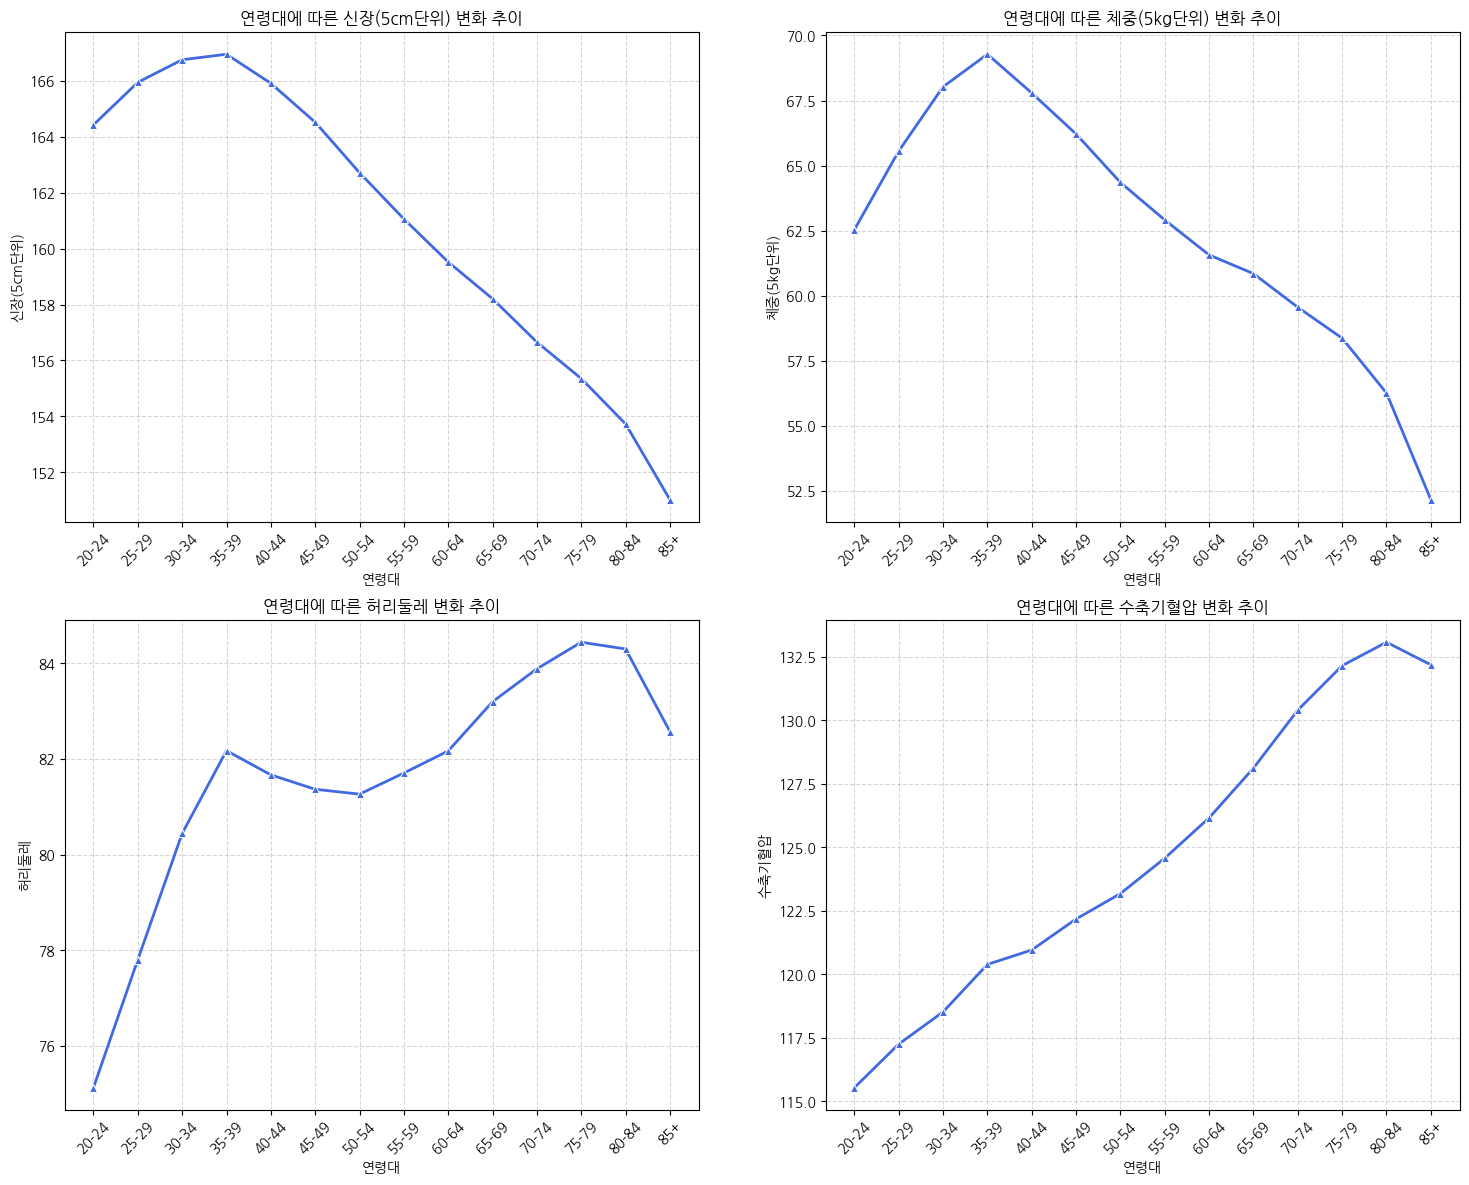

In [42]:
fig, axes = plt.subplots(2, 2, figsize =(18,14)) 
axes = axes.flatten()
# x: 원인이 되는 독립변수 , y: 그에 따라 변하는 결과 수치 
for i, col in enumerate(target_cols): # enumerate() : 리스트의 순서(인덱스)와 값을 동시에 꺼내주는 함수
    sns.lineplot(data= age_pivot, x='연령대', y = col, ax = axes[i], palette='Set2', marker = '^', color = 'royalblue', linewidth=2)
    axes[i].set_title(f'연령대에 따른 {col} 변화 추이')
    axes[i].grid(True, linestyle = '--', alpha= 0.5) # 격자 추가로 수치 파악 용이 
    axes[i].tick_params(axis='x', rotation = 45) # 연령대 글자 겹침 방지
plt.show()

#### 문제18 : BMI를 계산하고, 각 범주별로 분류해부세요.

체질량 지수(BMI)는 개인의 체중(kg)을 신장(m)의 제곱으로 나눈 값으로 계산하며, 비만도를 판단하는 데 널리 사용됩니다. BMI를 계산하여 각 개인의 비만도를 분류해보세요.


$$BMI= \frac{체중(kg)}{신장(m)^2}$$

BMI에 따른 비만도 분류는 다음과 같습니다:

- 저체중: BMI < 18.5
- 정상 체중: 18.5 ≤ BMI < 25
- 과체중: 25 ≤ BMI < 30
- 비만: BMI ≥ 30

세계보건기구(WHO)의 BMI 분류는 다음과 같습니다:

- 저체중: BMI < 18.5
- 정상: 18.5 ≤ BMI < 24.9
- 과체중: 24.9 ≤ BMI < 30
- 비만: BMI ≥ 30

In [43]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '연령대'],
      dtype='object')

In [44]:
#return은 반드시 함수 안에서만 사용해야 함. 
# def get_bmi_catgory(bmi):
# if BMI >= 30: #위에서부터 내려오는 게 범위 안 겹침
#     return "비만"
# elif BMI >= 24.9 :
#     return "과체중"
# elif BMI >= 18.5:
#     return "정상"
# else:
#     return "저체중"


In [45]:
# BMI로 분류 --> 데이터 구간화 
# pd.cut(): 숫자 데이터를 특정 구간(bins)으로 나누어 범주형(label) 데이터로 변환할 때 사용
# bins: 나눌 구간 경계값을 리스트 형태로 지정 | labels: 각 구간에 붙일 이름을 지정 | right = False 구간 오른쪽 경계를 포함하지 않도록 설정
df['BMI'] = round(df['체중(5kg단위)'] / (df['신장(5cm단위)'] / 100)**2, 1)
df['obesity'] = pd.cut(df['BMI'],
                       bins = [0, 18.5, 24.9, 30, np.inf], #bins은 increase해야 함. | np.inf(infinite)는 무한대라는 의미
                       right = False,
                       labels = ['저체중','정상','과체중','비만'] #label은 bins edge보다 하나 적어야 함.
)

In [46]:
df.head(3)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령대,BMI,obesity
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,...,20.0,15.0,1.0,0.0,0,NaN,NaN,65-69,29.3,과체중
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,...,10.0,7.0,1.0,1.0,0,NaN,NaN,40-44,20.0,정상
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,...,15.0,15.0,1.0,1.0,0,NaN,NaN,60-64,26.7,과체중


#### 문제19 : BMI 대한 기초 통계량을 확인해보세요.

In [47]:
# BMI에 관한 기초 통계량 계산

df['BMI'].describe()

# - 저체중: BMI < 18.5
# - 정상 체중: 18.5 ≤ BMI < 25
# - 과체중: 25 ≤ BMI < 30
# - 비만: BMI ≥ 30

count    1000000.000000
mean          24.162016
std            3.933920
min            9.800000
25%           21.500000
50%           23.900000
75%           26.200000
max           63.800000
Name: BMI, dtype: float64

#### 문제20 : BMI에 대한 분포를 더 자세히 살펴보기 위해 히스토그램과 박스 플롯을 사용해 시각화해보세요.

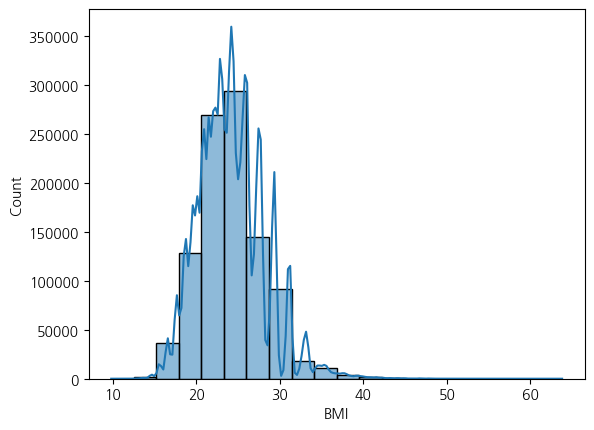

In [48]:
plt.figure()
sns.histplot(data=df, x= 'BMI', bins = 20 ,kde = True)
plt.show()

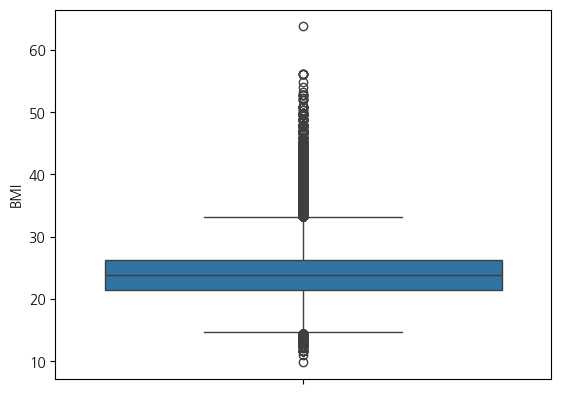

In [49]:
plt.figure()
sns.boxplot(data=df, y= 'BMI')
plt.show()

In [50]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?
# - 저체중: BMI < 18.5
# - 정상 체중: 18.5 ≤ BMI < 25
# - 과체중: 25 ≤ BMI < 30
# - 비만: BMI ≥ 30

BMI가 대부분 정상 체중 범위에 있는 것으로 확인되나, 히스토그램의 경우에는 오른쪽 꼬리가 길게 분포되어있으며,   
박스플롯의 경우에는 위쪽으로 이상치들이 대량 분포되어 있는 것을 보아 따로 위험군으로 두고 관리해야 할 것으로 보인다. 


#### 문제21 : BMI 범주별 분포를 분석해보세요.
- 위에서 분류한 각 범주별로 인구 분포를 확인해보세요.

In [ ]:
df.head()
# 범주별 인구 분포 -> value_counts() 고윳값 숫자로 바로 확인
df['obesity'].value_counts() 

obesity
정상     555750
과체중    324487
비만      67886
저체중     51877
Name: count, dtype: int64

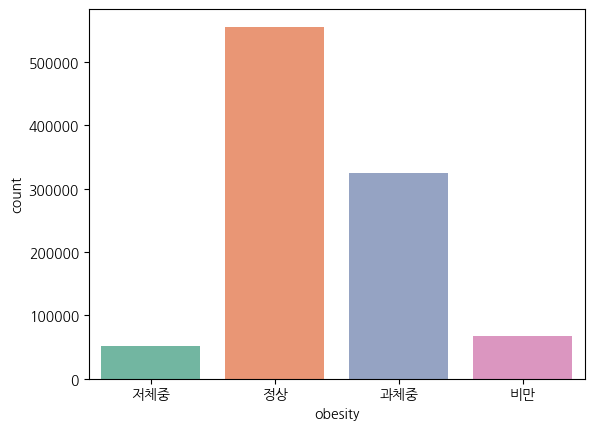

In [58]:
# countplot: 범주형 데이터의 빈도수를 막대 그래프로 그려주는 함수.
# histplot과 비슷하지만, x축이 딱딱 끊어지는 카테고리일 때 더 편함. 
plt.figure()
sns.countplot(data=df, x='obesity', palette='Set2')
plt.show()

In [ ]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?

(단순 순위 적기보다는 비중 표현해보기)  
'정상'이 가장 많지만, '과체중'과 '비만' 그룹을 합치면 그 비중이 상당히 두텁게 나타나며, 이는 '과체중 이상' 인구가 무시할 수 없는 수준임을 시사하며, 앞서 BMI 히스토그램에서 관측한 오른쪽으로 긴 꼬리의 실체이기도 하다. 
즉, 정상 체중이 가장 높은 비중을 차지하나, 과체중 이상의 잠재적 관리 대상군 또한 상당한 비중을 점유하고 있다. 

#### 문제22 : 비만도(BMI 범주)와 다른 건강 지표(수축기혈압, 이완기혈압, 식전혈당) 간의 관계를 살펴보세요
- 기술 통계와 시각화를 모두 진행해주세요.

In [66]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '연령대', 'BMI', 'obesity'],
      dtype='object')

In [73]:
# 그룹별 기술통계 --> .agg() 사용
health_metircs = ['수축기혈압','이완기혈압','식전혈당(공복혈당)']
# 그룹별 평균값 계산
grouped_stats = df.groupby('obesity')[health_metircs].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
display(grouped_stats.T)


obesity                     저체중             정상            과체중            비만
수축기혈압      count   51553.000000  552826.000000  322551.000000  67514.000000
           mean      113.761314     120.824048     126.910253    131.429081
           median    112.000000     120.000000     126.000000    130.000000
           std        13.786542      14.259226      13.788812     14.363561
           min        71.000000      54.000000      66.000000     80.000000
           max       214.000000     255.000000     269.000000    265.000000
이완기혈압      count   51553.000000  552826.000000  322551.000000  67514.000000
           mean       70.562955      74.152055      78.126755     81.678126
           median     70.000000      74.000000      78.000000     80.000000
           std         9.577453       9.828659       9.912687     10.689185
           min        35.000000      10.000000      23.000000     33.000000
           max       139.000000     150.000000     180.000000    170.000000
식전혈당(공복혈당) count   51555.000000  552792.000000  322533.000000  67509.000000
           mean       92.914363      98.625074     104.569830    109.402687
           median     91.000000      95.000000      99.000000    102.000000
           std        18.062904      21.507701      25.110457     30.665735
           min        37.000000      11.000000      10.000000     31.000000
           max       700.000000     902.000000     910.000000    649.000000

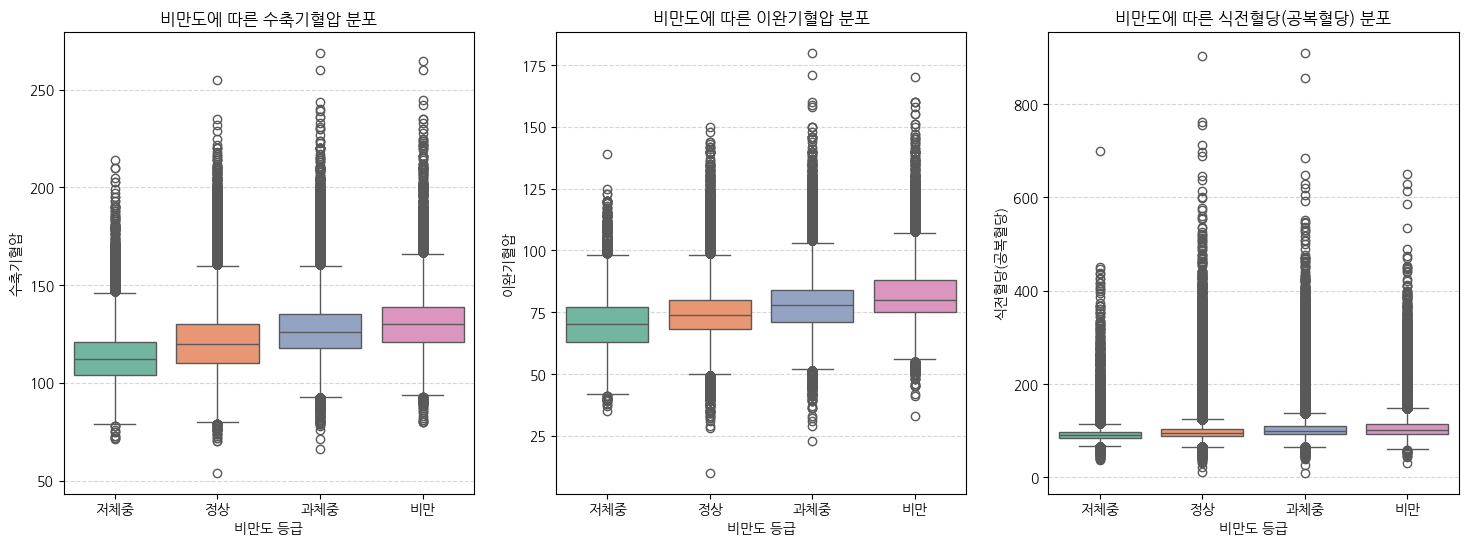

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

health_metircs = ['수축기혈압','이완기혈압','식전혈당(공복혈당)']
order_list = ['저체중','정상','과체중','비만']

fig, axes = plt.subplots(1,3,figsize=(18,6)) # 1행 3열의 도화지 준비

for i, col in enumerate(health_metircs):
    #  원본 데이터를 사용하여 분포를 그림
    # x축: 비만도 그룹, y축: 건강 지표 수치
    sns.boxplot(data=df, x='obesity', y=col, 
                order=order_list, ax=axes[i], palette='Set2')
    
    # 그래프 꾸미기
    axes[i].set_title(f'비만도에 따른 {col} 분포', fontsize=12)
    axes[i].set_xlabel(f'비만도 등급')
    axes[i].set_ylabel(col)
    axes[i].grid(True, axis = 'y', linestyle = '--', alpha= 0.5) #y축 격자 추가

In [ ]:
# 위 데이터에서 어떤 인사이트를 확인할 수 있나요?

- 비만도에 따른 수축기혈압 분포와 이완기 혈압 분포를 관측한 결과,  
  저체중부터 비만까지 박스플롯의 중앙값이 점점 상승하는 것으로 보인다.   
  저체중에 이상치가 가장 덜 관측되고, 그 외 범주에서도 이상치가 고르게 보인다.   

- 비만도에 따른 식전혈당 분포를 관측한 결과, 정상 범위에서 많은 이상치가 분포하는 것으로 판단되며, 정상과 과체중의 경우에는 800을 훌쩍 넘는 극단값도 볼 수 있다. 
- 또 하나의 특이사항은, 정상과 과체중의 식정혈당 분포의 이상치가 비만의 식전혈당 분포의 이상치보다 더 많이 보인다는 점이다.  

#### 문제23 : 연령대 및 성별에 따른 BMI 변화를 분석해보세요.
- 연령대가 증가함에 따라 BMI가 어떻게 변화하는지, 그리고 남성과 여성 간의 차이가 있는지를 파악해보세요.
- 데이터를 성별과 연령대 코드로 그룹화하여 각 그룹의 평균 BMI를 계산하고 시각화해보세요.  

In [62]:
df.groupby(['연령대','성별'])['BMI'].mean()

연령대    성별
20-24  1     24.547063
       2     21.866568
25-29  1     25.165129
       2     21.968224
30-34  1     25.767279
       2     22.343548
35-39  1     25.994673
       2     22.724858
40-44  1     25.744222
       2     22.863062
45-49  1     25.394330
       2     23.020829
50-54  1     25.090837
       2     23.225681
55-59  1     24.759819
       2     23.526653
60-64  1     24.502608
       2     23.744014
65-69  1     24.383448
       2     24.111855
70-74  1     24.099154
       2     24.332169
75-79  1     23.942289
       2     24.307698
80-84  1     23.441212
       2     24.013650
85+    1     22.786396
       2     22.792351
Name: BMI, dtype: float64

In [ ]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?

60대까지는 남성이 여성에 비해 평균 BMI 수치가 높으며, 성별 간의 BMI 수치는 20대 초반인 20-24에는 3 정도 차이가 나며, 그 이후로 4, 3, 2, 1로 차이가 줄어들다가 60대이후로는 소숫점 단위의 차이 정도만 보이며 85+로는 여성, 남성 모두 기존 BMI 수치보다 2가량 확연히 낮아진 모양새다. 

## 마무리

다양한 통계 및 시각화 분석을 진행하였습니다. 모두들 수고하셨습니다.    
제공된 문제 이외에도 다양한 분석을 진행할 수 있습니다. 마음껏 도전해보세요!